In [1]:
from PETITE import moliere
import numpy as np

In [2]:
print(moliere.generate_moliere_angle.__doc__)


    Generate the physical angle in radians by sampling from the Moliere distribution
    Note that Bethe used Gaussian units for his electromagnetic charge
    t - target thickness is measured in g/cm^2 (a common unit for the radiation length)
    beta - velocity in c=1
    A - atomic weight in g/mol (i.e., PDG conventions)
    Z - charge of target nucleus
    z - charge of beam particle
    


In [3]:
%precision %.15f
Z_fixed=10.0 
A_fixed=3.0
t_fixed=20.0
beta_fixed=np.sqrt(1-1/10**4)
chi_c_squared=moliere.get_chic_squared(t_fixed, beta_fixed, A_fixed, Z_fixed, 1) 
B=moliere.get_capital_B(t_fixed, beta_fixed, A_fixed, Z_fixed, 1)
print(moliere.get_capital_B(t_fixed, beta_fixed, A_fixed, Z_fixed, 1))
print(moliere.get_chic_squared(t_fixed, beta_fixed, A_fixed, Z_fixed, 1) )
print(moliere.generate_moliere_angle_simplified_alt(t_fixed,beta_fixed, A_fixed, Z_fixed, 1.0))
print(moliere.generate_moliere_angle(t_fixed,beta_fixed, A_fixed, Z_fixed, 1.0))

16.667719748501845
0.044077063197052846
-0.9273438863000221
-0.9780096735910024


In [5]:
l_fast=[]
l_Bethe=[]

for n in range(0,10000):
    l_fast.append(moliere.generate_moliere_angle_simplified_alt(t_fixed,beta_fixed, A_fixed, Z_fixed, 1.0))
    l_Bethe.append(moliere.generate_moliere_angle(t_fixed,beta_fixed, A_fixed, Z_fixed, 1.0))
    
l_fast=np.asarray(l_fast)
l_Bethe=np.asarray(l_Bethe)


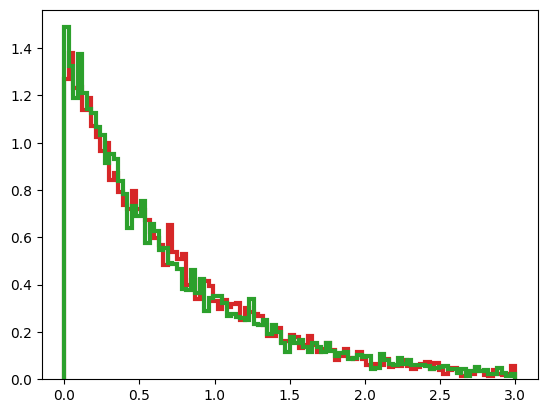

In [6]:
import matplotlib.pyplot as plt

b0 = np.linspace(0, 3 , 101)

plt.hist(l_fast**2,bins=b0,histtype='step', lw=3, color='C3', density=True)
plt.hist(l_Bethe**2,bins=b0, histtype='step', lw=3, color='C2',density=True)
plt.show() 

In [7]:
end_point=10
b0 = np.linspace(0, end_point , 401)
x=np.linspace(0,end_point,401)

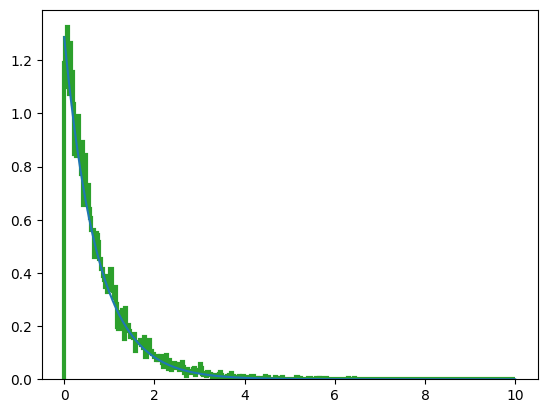

In [12]:
F = 0.98
chic2 = moliere.get_chic_squared_alt(t_fixed, beta_fixed, A_fixed, Z_fixed, 1)
chia2 = moliere.get_chia_squared_alt(beta_fixed, A_fixed, Z_fixed, 1)
omega = chic2/chia2
v = 0.5*omega/(1.-F)
theta0 = np.sqrt(chic2 * ((1.+v)*np.log(1.+v)/v -1)/(1.+F**2))

plt.hist(l_fast**2,bins=b0, histtype='step', lw=3, color='C2',density=True)
plt.plot(x,np.exp(-x/theta0**2/2)/np.sqrt(theta0))
plt.show()


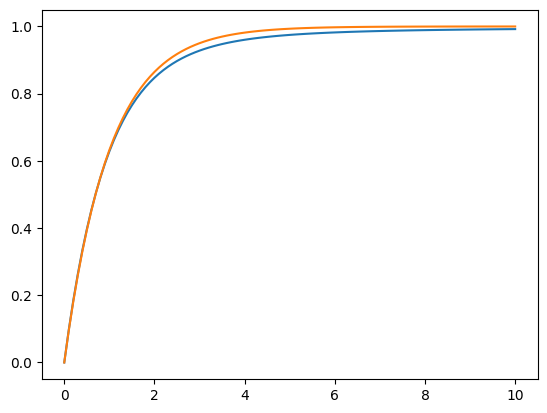

In [9]:
cdf_B=np.vectorize(lambda y: moliere.moliere_cdf(y,B) )
x=np.linspace(0,10,101)
plt.plot(x,cdf_B(x))
plt.plot(x,1-np.exp(-x))
plt.show()

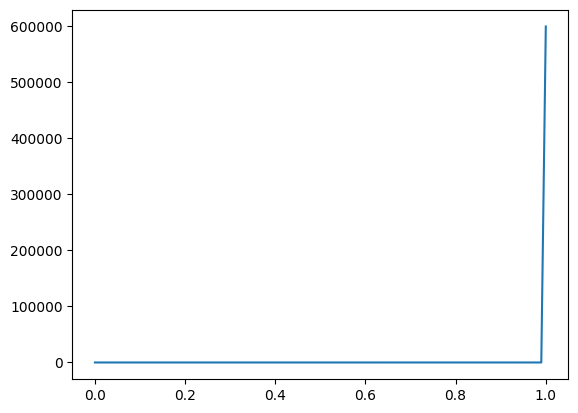

In [10]:
inv_cdf_B=np.vectorize(lambda y: moliere.inverse_moliere_cdf(y,B) )
x=np.linspace(0,0.9999999,101)
plt.plot(x,inv_cdf_B(x))
plt.show()

In [342]:
inv_cdf_B(0.9999999999999)

Failed to bracket root


SystemExit: 0